# Don't use ChatGPT

## Solve following tasks and give for each detailed descriptions with reasoning. 
## Deadline: Monday (04 Nov) 16:00
## Submit to my email: elnura.nabigazinova@sdu.edu.kz

<h2>Files:</h2>
    <a href="https://docs.google.com/spreadsheets/d/1k5VglEeuwKHcgBft_FSJm263kwjxkQWQ/edit?usp=sharing&ouid=100807504055607576237&rtpof=true&sd=true">sdu_reg.xlsx; </a>
    <a href="https://www.kaggle.com/paree24/development-index">Development Index Dataset; </a>
    <a href="https://www.kaggle.com/datasets/nolanbconaway/pitchfork-data">Pitchfork Dataset</a>

### 1. Use sdu_reg.xlsx file for this assignment. 
Select any 5 following formats then compare in plots their Read speed, Write speed and File sizes

CSV, JSON, HTML, HDF5 Format, Feather Format, Parquet Format, Msgpack, Python Pickle Format, SQL

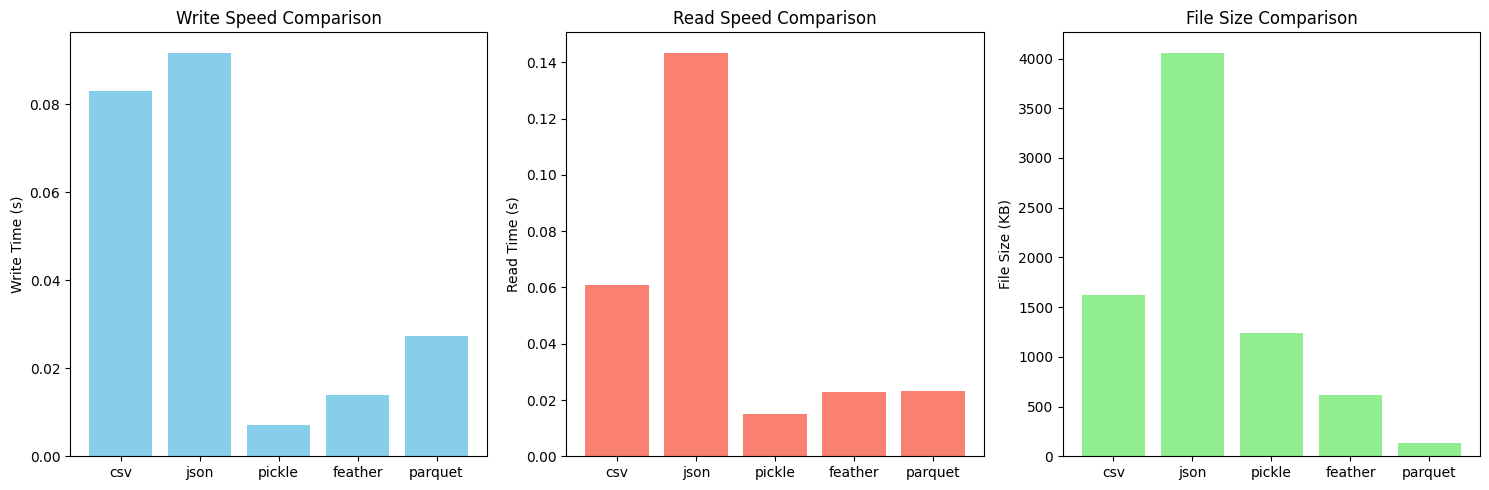

In [ ]:
import pandas as pd
import time
import os
import matplotlib.pyplot as plt

file_path = 'sdu-reg.xlsx'
data = pd.read_excel(file_path)

formats = {
    "csv": "data.csv",
    "json": "data.json",
    "pickle": "data.pkl",
    "feather": "data.feather",
    "parquet": "data.parquet"
}

write_times = {}
read_times = {}
file_sizes = {}

for fmt, filename in formats.items():
    start = time.time()
    if fmt == "csv":
        data.to_csv(filename, index=False)
    elif fmt == "json":
        data.to_json(filename, orient="records")
    elif fmt == "pickle":
        data.to_pickle(filename)
    elif fmt == "feather":
        data.to_feather(filename)
    elif fmt == "parquet":
        data.to_parquet(filename)
    write_times[fmt] = time.time() - start
    file_sizes[fmt] = os.path.getsize(filename) / 1024  

for fmt, filename in formats.items():
    start = time.time()
    if fmt == "csv":
        pd.read_csv(filename)
    elif fmt == "json":
        pd.read_json(filename)
    elif fmt == "pickle":
        pd.read_pickle(filename)
    elif fmt == "feather":
        pd.read_feather(filename)
    elif fmt == "parquet":
        pd.read_parquet(filename)
    read_times[fmt] = time.time() - start

formats_list = list(formats.keys())
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(formats_list, [write_times[fmt] for fmt in formats_list], color='skyblue')
plt.ylabel("Write Time (s)")
plt.title("Write Speed Comparison")

plt.subplot(1, 3, 2)
plt.bar(formats_list, [read_times[fmt] for fmt in formats_list], color='salmon')
plt.ylabel("Read Time (s)")
plt.title("Read Speed Comparison")

plt.subplot(1, 3, 3)
plt.bar(formats_list, [file_sizes[fmt] for fmt in formats_list], color='lightgreen')
plt.ylabel("File Size (KB)")
plt.title("File Size Comparison")

plt.tight_layout()
plt.show()


### 2. Use sqlite database to read data from “Pitchfork” music-centric online magazine.
Extract, Transform and Load data to pitchfork.sqlite database you can also create CSV files, and answer to the following questions:
1. Do review scores for individual artists generally improve over time, or go down?
2. How has Pitchfork's review genre selection changed over time?
3. Who are the most highly rated artists? The least highly rated artists?

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('database.sqlite')

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:", tables)

Tables in the database:       name
0  reviews
1  artists
2   genres
3   labels
4    years
5  content


In [5]:
reviews_df = pd.read_sql_query("SELECT * FROM reviews", conn)
artists_df = pd.read_sql_query("SELECT * FROM artists", conn)
genres_df = pd.read_sql_query("SELECT * FROM genres", conn)

In [38]:
reviews_df

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18389,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


In [40]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [36]:
artists_df

,reviewid,artist
0,22703,massive attack
1,22721,krallice
2,22659,uranium club
3,22661,kleenex
4,22661,liliput
...,...,...
18826,1535,coldcut
18827,1341,cassius
18828,5376,mojave 3
18829,2413,don caballero


In [39]:
genres_df

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic
...,...,...
22675,5376,rock
22676,2413,rock
22677,2413,metal
22678,2413,experimental


In [6]:
reviews_df['pub_date'] = pd.to_datetime(reviews_df['pub_date'])
reviews_df["artist"] = reviews_df["artist"].astype(str)
reviews_df['artist'] = reviews_df['artist'].str.replace(r'[$]', '', regex=True)
artist_score_trend = reviews_df.groupby(['artist', reviews_df['pub_date'].dt.year])['score'].mean().unstack()
print("Artist Score Trend Over Time:\n")
artist_score_trend


Artist Score Trend Over Time:



pub_date,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
artist,,,,,,,,,,,,,,,,,,,
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN
!!!,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,8.0,NaN,NaN,6.85,NaN,NaN,6.00,NaN,6.9,NaN,NaN
"!!!, out hud",NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+/-,NaN,NaN,NaN,8.4,7.5,7.6,NaN,7.05,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-ziq,5.1,NaN,9.4,NaN,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.55,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zulu winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,NaN,NaN,NaN,NaN,NaN
zwan,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
import matplotlib.pyplot as plt

filtered_trend = artist_score_trend.dropna(how='all')
filtered_trend = filtered_trend.loc[:, '2000':'2017'].head(100)


In [50]:
print(filtered_trend.shape)  
print(filtered_trend.head())

(100, 18)
pub_date      2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
artist                                                                     
               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
!!!            NaN   NaN   NaN   NaN   7.0   NaN   NaN   8.0   NaN   NaN   
!!!, out hud   NaN   NaN   NaN   NaN   6.0   NaN   NaN   NaN   NaN   NaN   
+/-            NaN   NaN   8.4   7.5   7.6   NaN  7.05   NaN   5.0   NaN   
-ziq           NaN   9.4   NaN   7.9   NaN   NaN   NaN   NaN   NaN   NaN   

pub_date      2010  2011  2012  2013  2014  2015  2016  2017  
artist                                                        
               NaN   NaN   NaN   NaN   6.2   NaN   NaN   NaN  
!!!           6.85   NaN   NaN  6.00   NaN   6.9   NaN   NaN  
!!!, out hud   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
+/-            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
-ziq           NaN   NaN   NaN  7.55   NaN   NaN   NaN   NaN  


C:\Users\Sultan\AppData\Local\Temp\ipykernel_704\1229335126.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


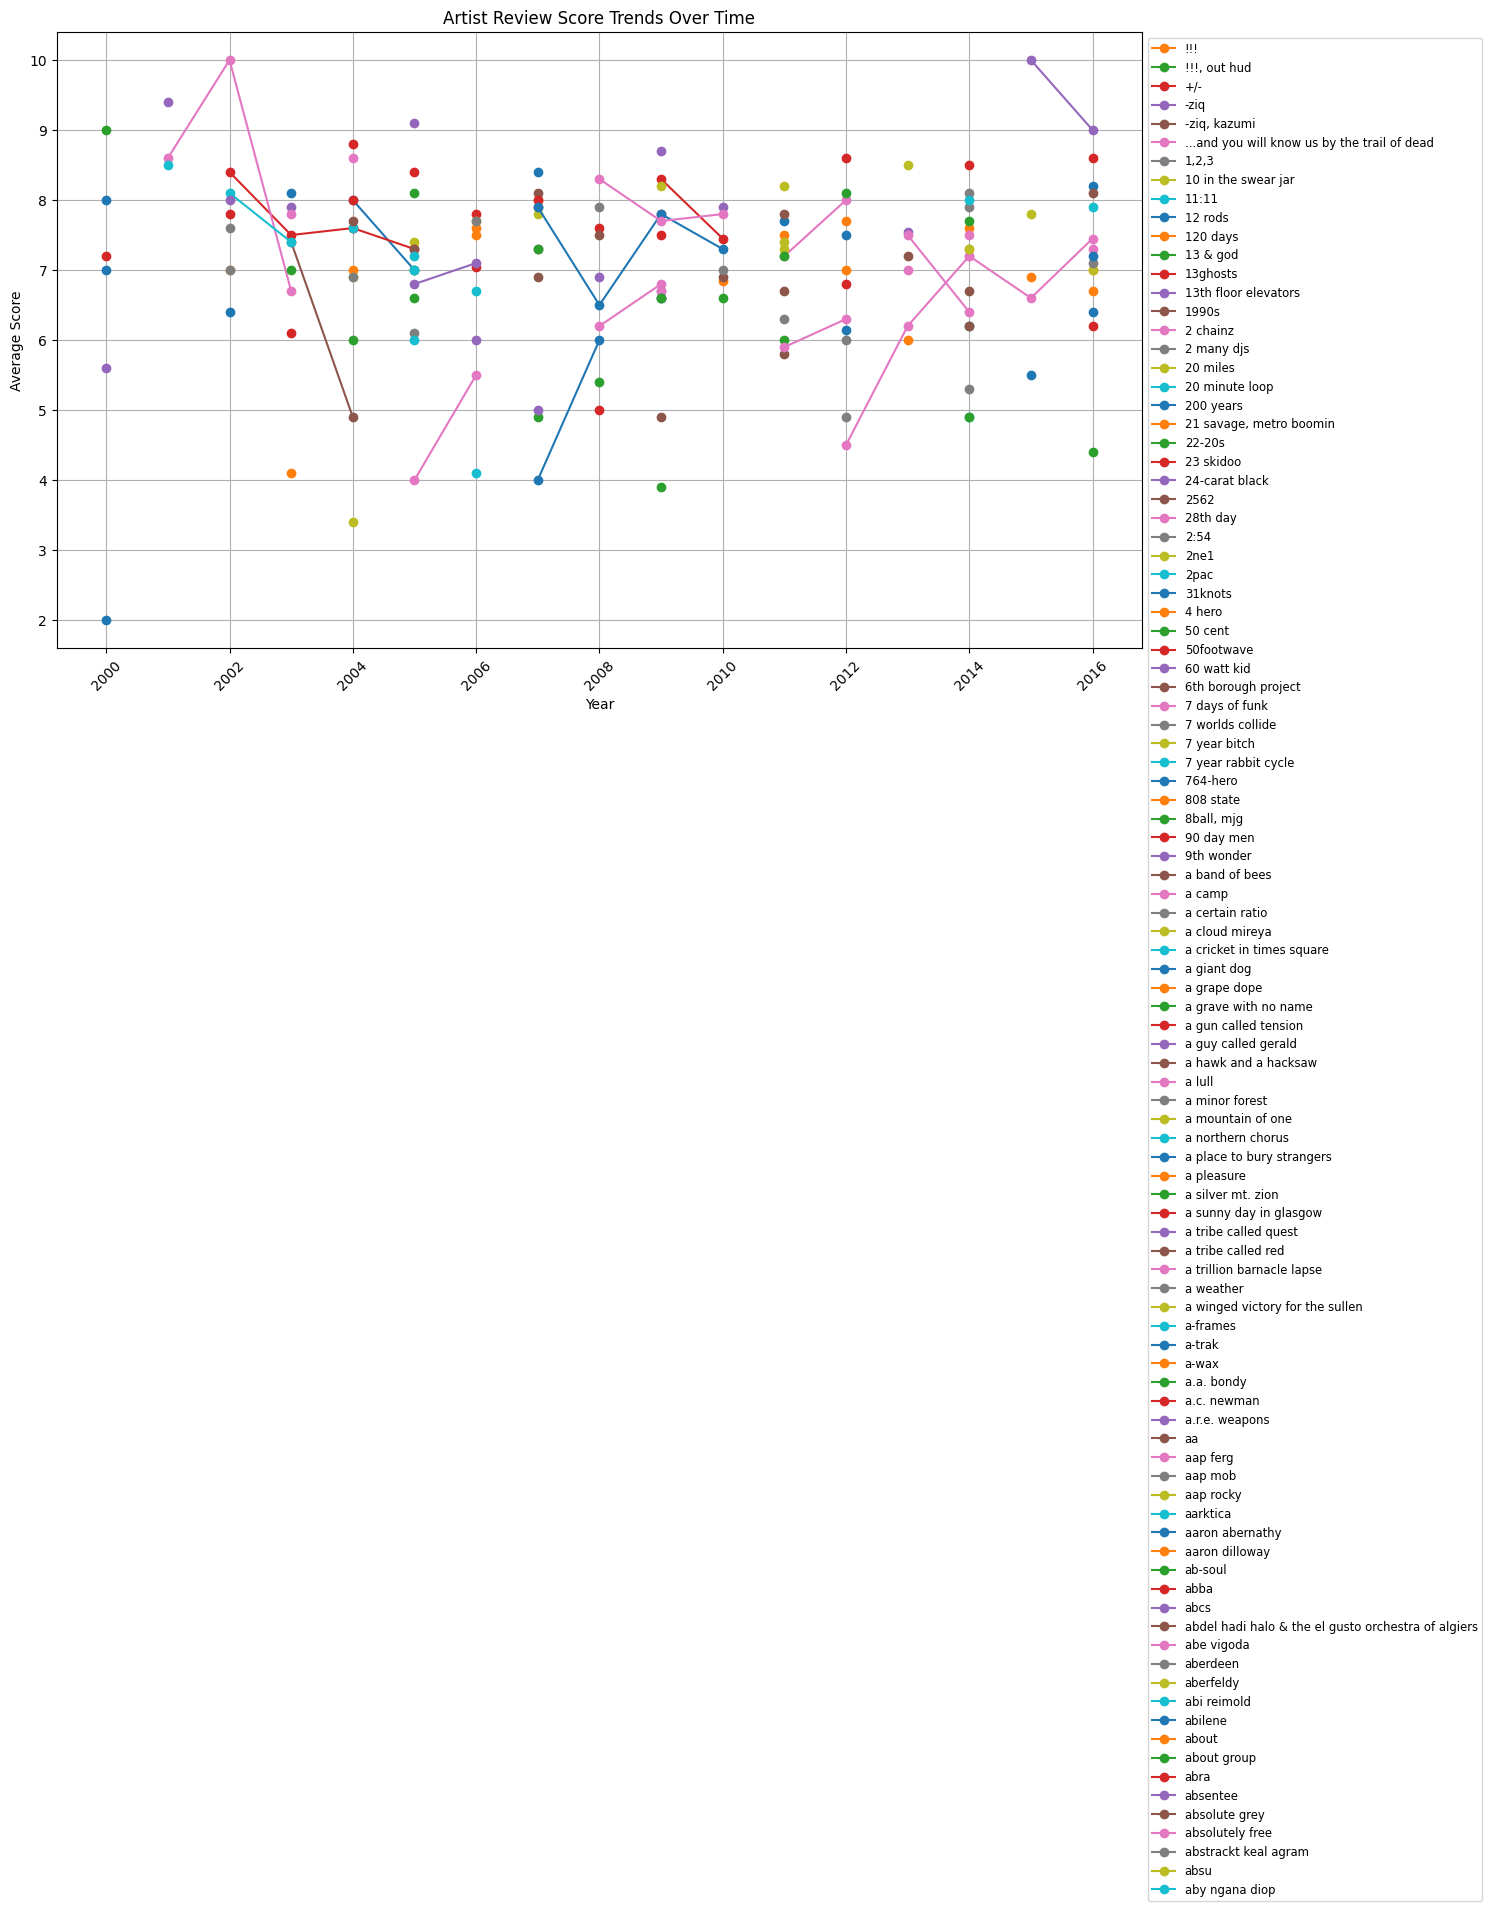

In [51]:
plt.figure(figsize=(14, 8))
for artist in filtered_trend.index:
    plt.plot(filtered_trend.columns, filtered_trend.loc[artist], marker='o', label=artist)

plt.title('Artist Review Score Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()

### 1. Do review scores for individual artists generally improve over time, or go down?
#### Generally, they are improving over time. But i couldn't condider all artists. Because matplotlib could not handle this big plot, and also a lot of lines just intersect and plot is not understandable.

In [43]:
genre_trend = reviews_df.merge(genres_df, left_on="reviewid", right_on="reviewid")
genre_trend = genre_trend.groupby([genre_trend['pub_date'].dt.year, 'genre']).size().unstack(fill_value=0)
print("Genre Selection Trend Over Time:\n")
genre_trend

Genre Selection Trend Over Time:



genre,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
pub_date,,,,,,,,,
1999,69,28,6,2,9,11,10,3,140
2000,80,31,5,6,17,20,25,11,227
2001,99,45,16,4,20,19,18,11,282
2002,190,90,30,6,40,50,48,54,491
2003,266,125,35,9,40,49,47,75,601
2004,242,142,48,11,50,45,80,85,632
2005,252,132,45,11,28,58,78,91,696
2006,242,138,58,16,21,65,91,71,705
2007,219,124,70,26,28,49,87,73,714


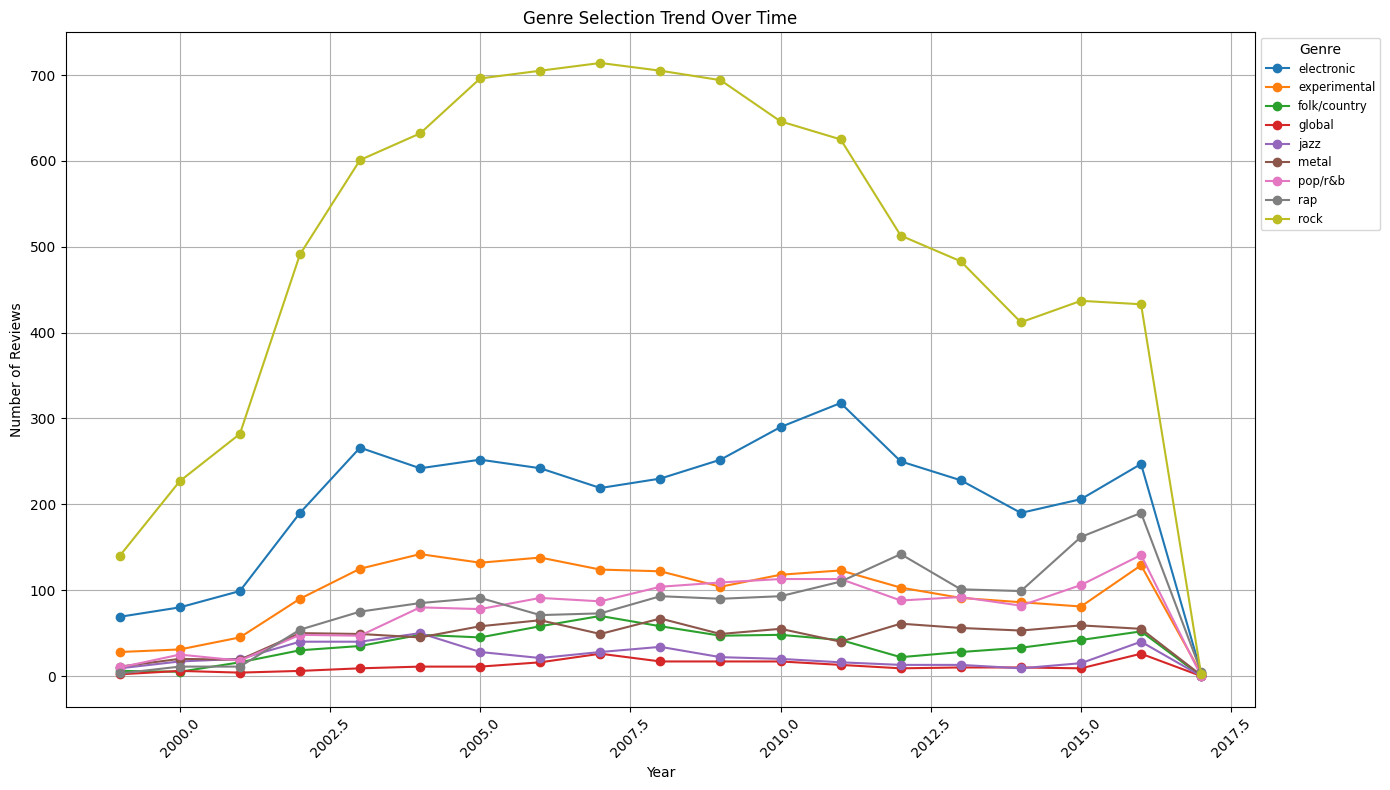

In [ ]:
plt.figure(figsize=(14, 8))

for genre in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[genre], marker='o', label=genre)
    
plt.title('Genre Selection Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid()
plt.tight_layout()

plt.show()

### How has Pitchfork's review genre selection changed over time?
#### So looking at he plot we can see that Pitchfork mostly reviewed rock genre music and their peak was between 2005 and 2010. Other genres were somehow at the same level between 0 anf 150 reviews a year, except electronic. Rap, pop/r&b and experimental music started to grow lately, unlike rock. 

In [45]:
artist_ratings = reviews_df.groupby('artist')['score'].mean().sort_values(ascending=False)
print("Top-rated artists:\n")
artist_ratings.head()


Top-rated artists:



artist
slint              10.0
television         10.0
talk talk          10.0
the stone roses    10.0
stevie wonder      10.0
Name: score, dtype: float64

### Who are the most highly rated artists? The least highly rated artists?
#### List of top 5 most and lowest rated artists, also in alphabetic order since our dataset is in it.

In [46]:
print("Lowest-rated artists:\n")
artist_ratings.tail()

Lowest-rated artists:



artist
liars academy                   0.6
shat                            0.2
dan le sac vs. scroobius pip    0.2
push kings                      0.1
travis morrison                 0.0
Name: score, dtype: float64

### 3. Use sdu_reg.xlsx file for this task.
Read the file into pandas DataFrame and solve following problems:
1. Find number of students in each year and level of education 
2. display courses where registered more than average course registration count
3. List all instructors who are going to submit more than 200 grades for each exam.
4. Plot a counts of courses for each educational program.

In [ ]:
df = pd.read_parquet("data.parquet")
df

,№,YEAR,TERM,EDU_LEVEL,CIPHER,PROG_CODE,SPECIALITY,EDU_LANG,CLASS,TYPE,STUD_ID,DERS_KOD,COURSE_TITLE,CREDITS,ECTS,SECTION,TEACHER
0,1,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1812,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
1,2,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1348,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
2,3,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1331,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
3,4,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1817,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
4,5,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1813,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,13337,2019,1,B,6B054001,10101,Mathematics,EN,4,N,stud45,MAT 450,Industrial project 3,3,5,1,Damir Kurmanbayev
13337,13338,2019,1,B,6B054001,10101,Mathematics,EN,4,N,stud227,MAT 450,Industrial project 3,3,5,1,Damir Kurmanbayev
13338,13339,2019,1,B,6B054001,10101,Mathematics,EN,4,N,stud217,MAT 450,Industrial project 3,3,5,1,Damir Kurmanbayev
13339,13340,2019,1,B,6B054001,10101,Mathematics,EN,4,N,stud44,MAT 450,Industrial project 3,3,5,1,Damir Kurmanbayev


1. Find number of students in each year and level of education 

In [64]:
students_per_year = df.groupby(['YEAR',"EDU_LEVEL"]).size().reset_index(name="STUDENT_COUNT")
students_per_year

,YEAR,EDU_LEVEL,STUDENT_COUNT
0,2019,B,12824
1,2019,DR,64
2,2019,M,453


2. display courses where registered more than average course registration count


In [69]:
avg_reg_cnt = df["COURSE_TITLE"].value_counts().mean()
above_avg = df["COURSE_TITLE"].value_counts()[df["COURSE_TITLE"].value_counts() > avg_reg_cnt]
above_avg

COURSE_TITLE
Physical Education 3                                            646
Probability and Mathematical Statictics                         588
Mathematics for Computer Science 1                              588
Linear Algebra                                                  586
Fundamentals of Programming                                     571
Physical Education 1                                            568
Turkish Language 3 (А2 level)                                   540
Turkish Language 1 (А1 level)                                   463
Introduction to Algorithms                                      437
Physics 1                                                       368
Internship 1                                                    303
Web programming: front end                                      288
Computer Networks 1                                             287
IT Infrastructure                                               280
Database Management Systems 1      

3. List all instructors who are going to submit more than 200 grades for each exam.

In [73]:
instructor_count = df['TEACHER'].value_counts()
above_200 = instructor_count[instructor_count > 200]
above_200

TEACHER
Zhantore Tursynbayev                          574
Yerbol Bugybayev                              402
Satbek Abdyldayev                             382
PhD Shynar Auyelbekova                        333
Zhanbolat Khanafiya                           315
Damir Kurmanbayev                             307
Dauren Ayazbayev                              288
Sinem Uysal                                   287
PhD Gaukhar Arepova                           279
Yilmaz Yaman                                  278
PhD Lyazat Naizabayeva                        277
Candidate of Science Zeine Orazbekova         275
Omirbek Maishykov                             268
Nursultan Doszhan                             266
Aisha Yershigeshova                           255
Jomart Aldamuratov                            249
Doctor of Science Gabit Sarsekeyev            247
Meraryslan Meraliyev                          238
Azamat Ordabekov                              237
Candidate of Science Gulfarida Tulemissova

4. Plot a counts of courses for each educational program.

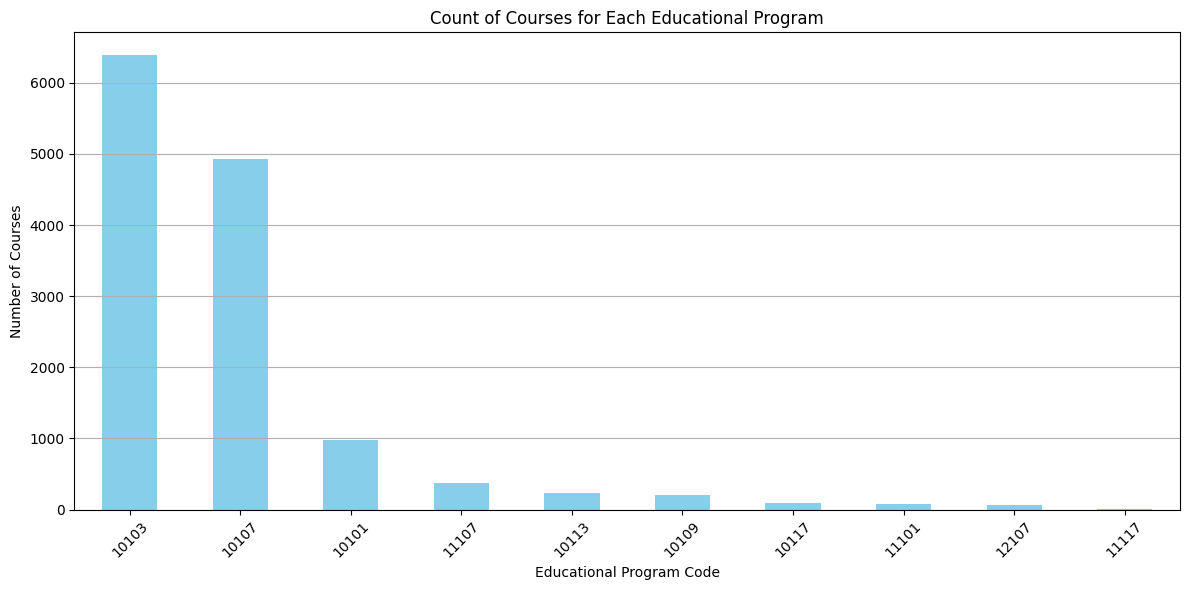

In [76]:
course_per_prog = df['PROG_CODE'].value_counts()
plt.figure(figsize=(12, 6))
course_per_prog.plot(kind='bar', color='skyblue')
plt.title('Count of Courses for Each Educational Program')
plt.xlabel('Educational Program Code')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 4. Use Development Index file for this task.
Solve a classification problem to classify countries by Development Index (response). 

Use KNN classifier in this task
Select only 3 columns (features)

### Step 0. Importing libs

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Step 1. Downloading file and checking for null values and categorical values

In [80]:
ml_df = pd.read_csv("Development Index.csv")
ml_df.info()
ml_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          225 non-null    int64  
 1   Area (sq. mi.)      225 non-null    int64  
 2   Pop. Density        225 non-null    float64
 3   GDP ($ per capita)  225 non-null    int64  
 4   Literacy (%)        225 non-null    float64
 5   Infant mortality    225 non-null    float64
 6   Development Index   225 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 12.4 KB


,Population,Area (sq. mi.),Pop. Density,GDP ($ per capita),Literacy (%),Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3
...,...,...,...,...,...,...,...
220,74777981,1127127,66.3,700,42.7,95.32,2
221,474413,2586,183.5,55100,100.0,4.81,4
222,1065842,5128,207.9,9500,98.6,24.31,3
223,3042004,111370,27.3,1000,57.5,128.87,1


### Step 2. Taking features to predict on and target value
#### Took Population Density because it is already derived from Population and Area, GDP and Literacy since they affect on development a lot in my opinion 

In [97]:
features = ml_df[["Pop. Density ","GDP ($ per capita)","Literacy (%)"]]
target = ml_df["Development Index"]

### Step 3. Scaling selected features

In [101]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Step 4. Splitting to test and train

In [102]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

### Step 5. Training model and making prediction

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

### Step 6. Evaluating our model performance

In [105]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[ 0  1  0  0]
 [ 2  6  2  0]
 [ 0  5 12  2]
 [ 0  1  3 11]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.46      0.60      0.52        10
           3       0.71      0.63      0.67        19
           4       0.85      0.73      0.79        15

    accuracy                           0.64        45
   macro avg       0.50      0.49      0.49        45
weighted avg       0.68      0.64      0.66        45


Accuracy: 64.44%


### 5. Answer for the following questions with your own words
1. Give the description for Hadoop HDFS architecture
2. What is MapReduce? How it works? Where it can be used?
3. Why partitioning required in Hive?

### 1. Hadoop HDFS architecture consists of two roles. Master Node and Slave Nodes in a cluster. Only Master node has a NameNode and optionally datanode, but each slave nodes must have datanode and cannot have namenode. NameNode is something that stores metadata of the objects in a cluster. DataNode is needed to store those objects. When reading or writing something in cluster, client request firstly goes to NameNode to retrieve information about a location of the exact file, and then proceeds to the node where NameNode said this file is.

### 2. MapReduce is a second component of Hadoop Framework as well as HDFS, but is responsible for transform operations made on big data. Each node can be either Mapper or Reducer, it is decided by Master Node's Job Tracker which knows about resources on each slave nodes. Task Trackers on each slave node receives informaiton about task that is given by master node. 
- Data sent by a client
- Data is splitted to chunks and sent to Mappers
- Mappers transform this chunks of data, and sends resulting output in a format of `key:value` to reducers according to hashcode of the key.
- Reducers take all `key:value` pairs and executes task that it was given, it may be taking sum or product of values with the same keys, or something else, depending on our code.
- Map tasks can be multiple, but reducer task is only one.
- Multiple MapReduce Jobs can be chained one after another as a pipeline, taking output of one as and input of the next, so no intermediate files are generated.

### 3. I don't know about Hive for now